In [15]:
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from scipy.signal import filtfilt, firwin, lfilter, find_peaks
import os
import pandas as pd


## ECG reposo

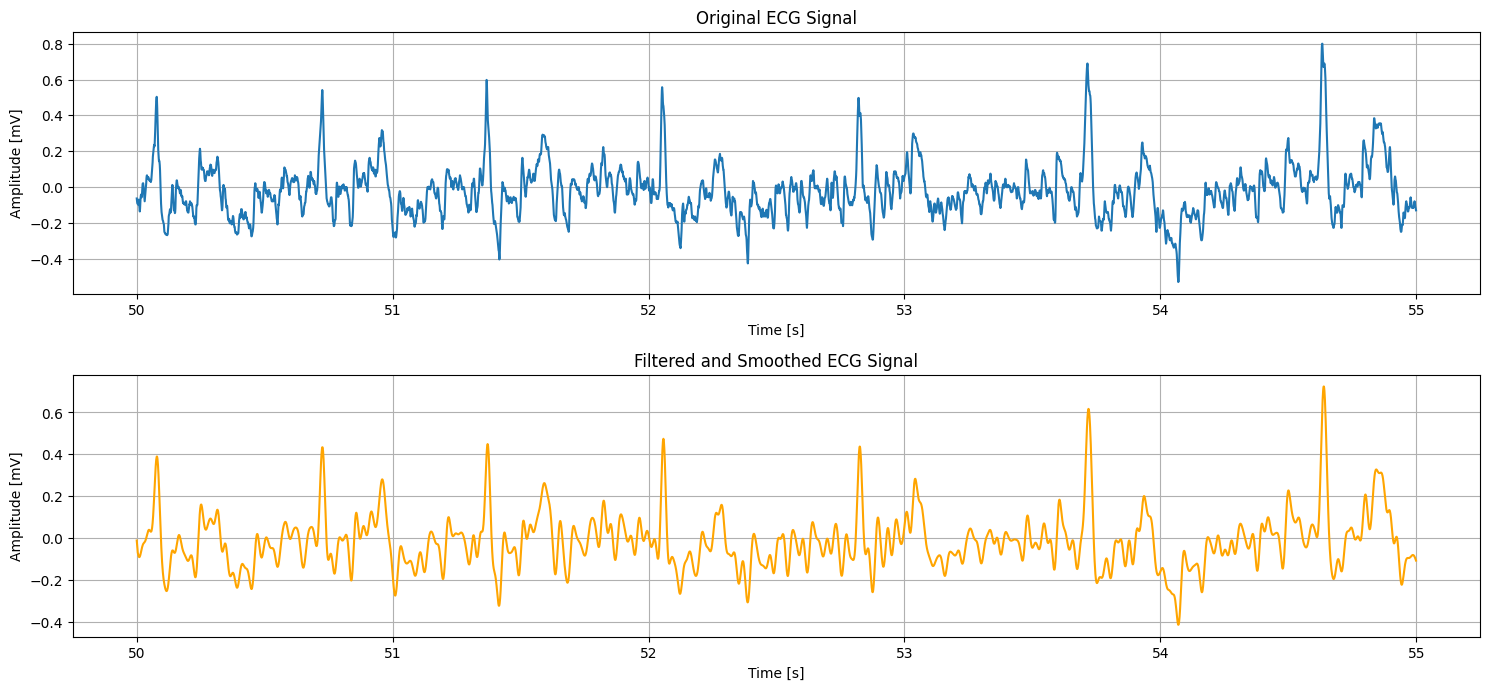

In [10]:
# URL of the raw text file containing ECG data
url= "https://raw.githubusercontent.com/diego-taquiri/ISB-equipo11/main/Documentaci%C3%B3n/Laboratorio%2006/ecg_raw_data/reposo/opensignals_98D341FD4F0D_2024-04-19_12-34-17.txt"
#url = "https://raw.githubusercontent.com/diego-taquiri/ISB-equipo11/main/Documentaci%C3%B3n/Laboratorio%2006/ecg_raw_data/ejercicio/opensignals_98D341FD4F0D_2024-04-19_12-46-31.txt"
#url= "https://raw.githubusercontent.com/diego-taquiri/ISB-equipo11/main/Documentaci%C3%B3n/Laboratorio%2006/ecg_raw_data/paro_cardiaco/opensignals_98D341FD4F0D_2024-04-19_12-56-28.txt"

# Download the data from the URL
response = urlopen(url)
data = response.read().decode('utf-8').splitlines()

# Load data from the downloaded text file skipping the first 3 rows
x = np.loadtxt(data, skiprows=3)

# Calculate data in millivolts
data_mV = (x[:, 5] / 1024) * 3.223 - 3.223 / 2

# Generate time array in seconds
time = np.arange(len(data_mV)) / 1000

start_index = np.searchsorted(time, 50)  # Find the index corresponding to 50 seconds
end_index = np.searchsorted(time, 55)  # Find the index corresponding to 120 seconds
time = time[start_index:end_index]
data_mV = data_mV[start_index:end_index]

# Bandpass filter design (0.5 Hz to 43 Hz)
fs = 1000  # Sampling frequency
nyquist = 0.5 * fs
low_cutoff = 0.5 / nyquist
high_cutoff = 43 / nyquist

# Design FIR filter
numtaps = 101  # Number of taps in the filter
b = firwin(numtaps, [low_cutoff, high_cutoff], pass_zero=False)

# Apply zero-phase digital bandpass filter
filtered_signal = filtfilt(b, 1, data_mV)

# Moving average filter design
window_size = 5  # Window size for the moving average filter
moving_avg_filter = np.ones(window_size) / window_size

# Apply moving average filter
smoothed_signal = lfilter(moving_avg_filter, 1, filtered_signal)

# Plot the original, filtered, and feature signals with detected peaks
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(time, data_mV, label='Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [mV]')
plt.title('Original ECG Signal')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(time, smoothed_signal, label='Filtered and Smoothed Signal', color='orange')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [mV]')
plt.title('Filtered and Smoothed ECG Signal')
plt.grid()

plt.tight_layout()
plt.show()


Number of segments: 45
Segment shape: (600,)
Segment samples: 600
Increment samples: 100
Segment starts: [   0  100  200  300  400  500  600  700  800  900 1000 1100 1200 1300
 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700
 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100
 4200 4300 4400]


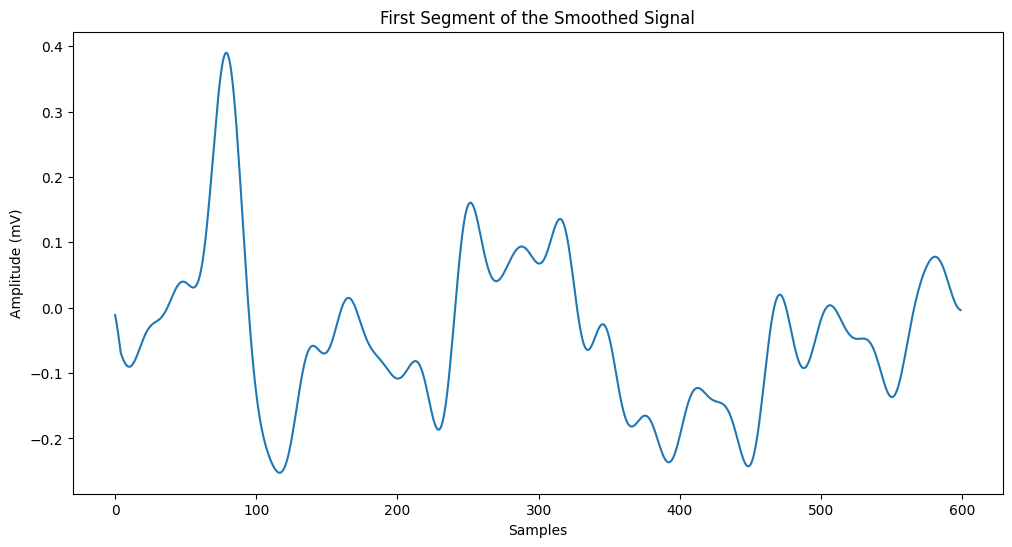

In [8]:
# Function to segment the signal
def segment_signal(signal, segment_length, increment, sampling_rate):
    segment_samples = int(segment_length * sampling_rate / 1000)
    increment_samples = int(increment * sampling_rate / 1000)
    segments = []
    for start in range(0, len(signal) - segment_samples + 1, increment_samples):
        end = start + segment_samples
        segments.append(signal[start:end])
    return np.array(segments), segment_samples, increment_samples, np.arange(0, len(signal) - segment_samples + 1, increment_samples)

# Segment parameters
segment_length = 600  # segment length in milliseconds
increment = 100  # increment in milliseconds

# Segment the smoothed signal
segments, segment_samples, increment_samples, segment_starts = segment_signal(smoothed_signal, segment_length, increment, fs)

# Print some information about the segments
print(f'Number of segments: {len(segments)}')
print(f'Segment shape: {segments[0].shape}')
print(f'Segment samples: {segment_samples}')
print(f'Increment samples: {increment_samples}')
print(f'Segment starts: {segment_starts}')

# Plot the first segment as an example
plt.figure(figsize=(12, 6))
plt.plot(segments[0])
plt.title('First Segment of the Smoothed Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude (mV)')
plt.show()

In [11]:
np.shape(segments)

(45, 600)

In [16]:
# Directory to save the CSV files
save_dir = './ecg_segments'

# Create the directory if it does not exist
os.makedirs(save_dir, exist_ok=True)

# Loop through each segment and save it as a CSV file
for i in range(segments.shape[0]):
    segment_data = segments[i]

    # Create a DataFrame with timestamps and channel data
    df = pd.DataFrame({
        'timestamp': np.arange(1, len(segment_data) + 1),
        'channel': segment_data
    })

    csv_file_path = os.path.join(save_dir, f'reposo.segment{i+1}.csv')
    df.to_csv(csv_file_path, index=False)

print("CSV files saved successfully!")

CSV files saved successfully!


## ECG en ejercicio

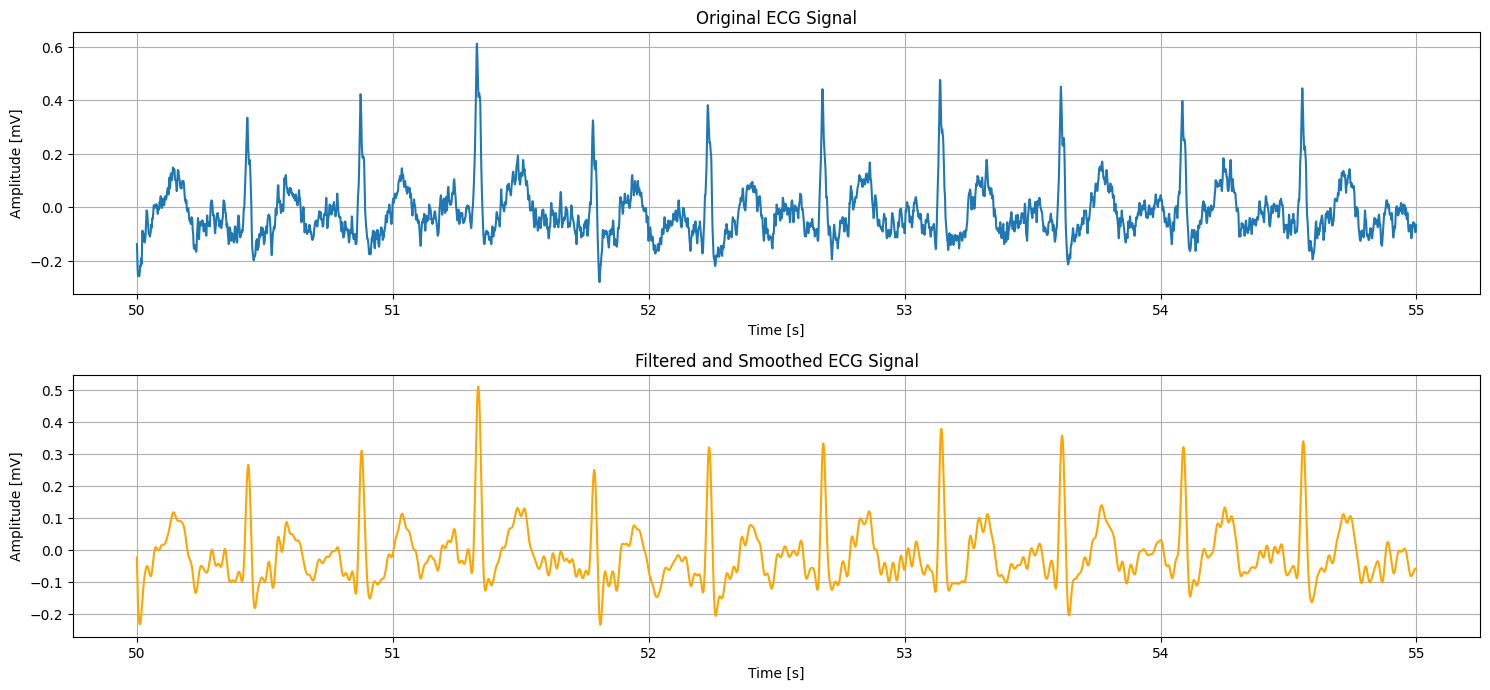

In [17]:
# URL of the raw text file containing ECG data
#url= "https://raw.githubusercontent.com/diego-taquiri/ISB-equipo11/main/Documentaci%C3%B3n/Laboratorio%2006/ecg_raw_data/reposo/opensignals_98D341FD4F0D_2024-04-19_12-34-17.txt"
url = "https://raw.githubusercontent.com/diego-taquiri/ISB-equipo11/main/Documentaci%C3%B3n/Laboratorio%2006/ecg_raw_data/ejercicio/opensignals_98D341FD4F0D_2024-04-19_12-46-31.txt"
#url= "https://raw.githubusercontent.com/diego-taquiri/ISB-equipo11/main/Documentaci%C3%B3n/Laboratorio%2006/ecg_raw_data/paro_cardiaco/opensignals_98D341FD4F0D_2024-04-19_12-56-28.txt"

# Download the data from the URL
response = urlopen(url)
data = response.read().decode('utf-8').splitlines()

# Load data from the downloaded text file skipping the first 3 rows
x = np.loadtxt(data, skiprows=3)

# Calculate data in millivolts
data_mV = (x[:, 5] / 1024) * 3.223 - 3.223 / 2

# Generate time array in seconds
time = np.arange(len(data_mV)) / 1000

start_index = np.searchsorted(time, 50)  # Find the index corresponding to 50 seconds
end_index = np.searchsorted(time, 55)  # Find the index corresponding to 120 seconds
time = time[start_index:end_index]
data_mV = data_mV[start_index:end_index]

# Bandpass filter design (0.5 Hz to 43 Hz)
fs = 1000  # Sampling frequency
nyquist = 0.5 * fs
low_cutoff = 0.5 / nyquist
high_cutoff = 43 / nyquist

# Design FIR filter
numtaps = 101  # Number of taps in the filter
b = firwin(numtaps, [low_cutoff, high_cutoff], pass_zero=False)

# Apply zero-phase digital bandpass filter
filtered_signal = filtfilt(b, 1, data_mV)

# Moving average filter design
window_size = 5  # Window size for the moving average filter
moving_avg_filter = np.ones(window_size) / window_size

# Apply moving average filter
smoothed_signal = lfilter(moving_avg_filter, 1, filtered_signal)

# Plot the original, filtered, and feature signals with detected peaks
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(time, data_mV, label='Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [mV]')
plt.title('Original ECG Signal')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(time, smoothed_signal, label='Filtered and Smoothed Signal', color='orange')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [mV]')
plt.title('Filtered and Smoothed ECG Signal')
plt.grid()

plt.tight_layout()
plt.show()


Number of segments: 45
Segment shape: (600,)
Segment samples: 600
Increment samples: 100
Segment starts: [   0  100  200  300  400  500  600  700  800  900 1000 1100 1200 1300
 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700
 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100
 4200 4300 4400]


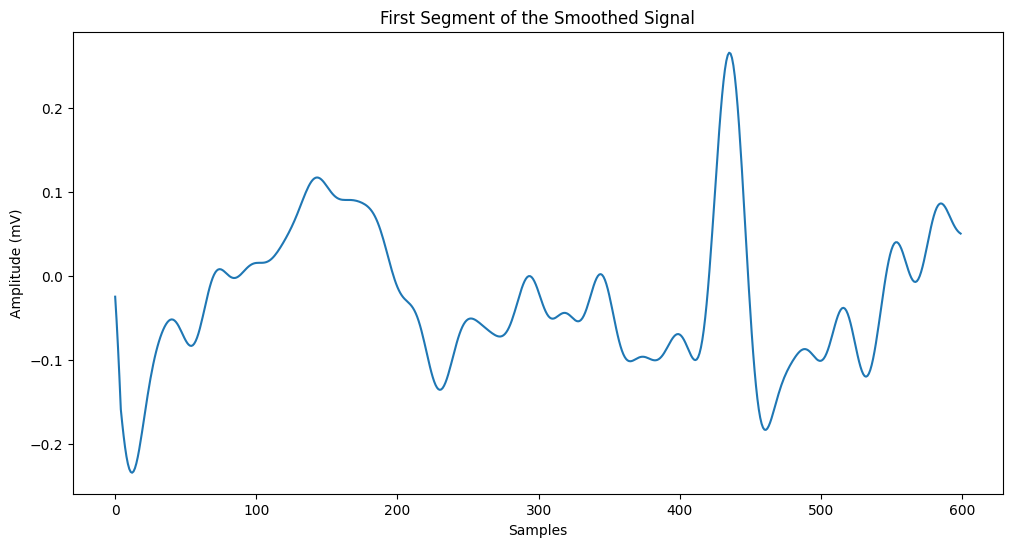

In [18]:
# Function to segment the signal
def segment_signal(signal, segment_length, increment, sampling_rate):
    segment_samples = int(segment_length * sampling_rate / 1000)
    increment_samples = int(increment * sampling_rate / 1000)
    segments = []
    for start in range(0, len(signal) - segment_samples + 1, increment_samples):
        end = start + segment_samples
        segments.append(signal[start:end])
    return np.array(segments), segment_samples, increment_samples, np.arange(0, len(signal) - segment_samples + 1, increment_samples)

# Segment parameters
segment_length = 600  # segment length in milliseconds
increment = 100  # increment in milliseconds

# Segment the smoothed signal
segments, segment_samples, increment_samples, segment_starts = segment_signal(smoothed_signal, segment_length, increment, fs)

# Print some information about the segments
print(f'Number of segments: {len(segments)}')
print(f'Segment shape: {segments[0].shape}')
print(f'Segment samples: {segment_samples}')
print(f'Increment samples: {increment_samples}')
print(f'Segment starts: {segment_starts}')

# Plot the first segment as an example
plt.figure(figsize=(12, 6))
plt.plot(segments[0])
plt.title('First Segment of the Smoothed Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude (mV)')
plt.show()

In [19]:
np.shape(segments)

(45, 600)

In [20]:
# Directory to save the CSV files
save_dir = './ecg_segments'

# Create the directory if it does not exist
os.makedirs(save_dir, exist_ok=True)

# Loop through each segment and save it as a CSV file
for i in range(segments.shape[0]):
    segment_data = segments[i]

    # Create a DataFrame with timestamps and channel data
    df = pd.DataFrame({
        'timestamp': np.arange(1, len(segment_data) + 1),
        'channel': segment_data
    })

    csv_file_path = os.path.join(save_dir, f'ejercicio.segment{i+1}.csv')
    df.to_csv(csv_file_path, index=False)

print("CSV files saved successfully!")

CSV files saved successfully!


## ECG en paro cardiaco

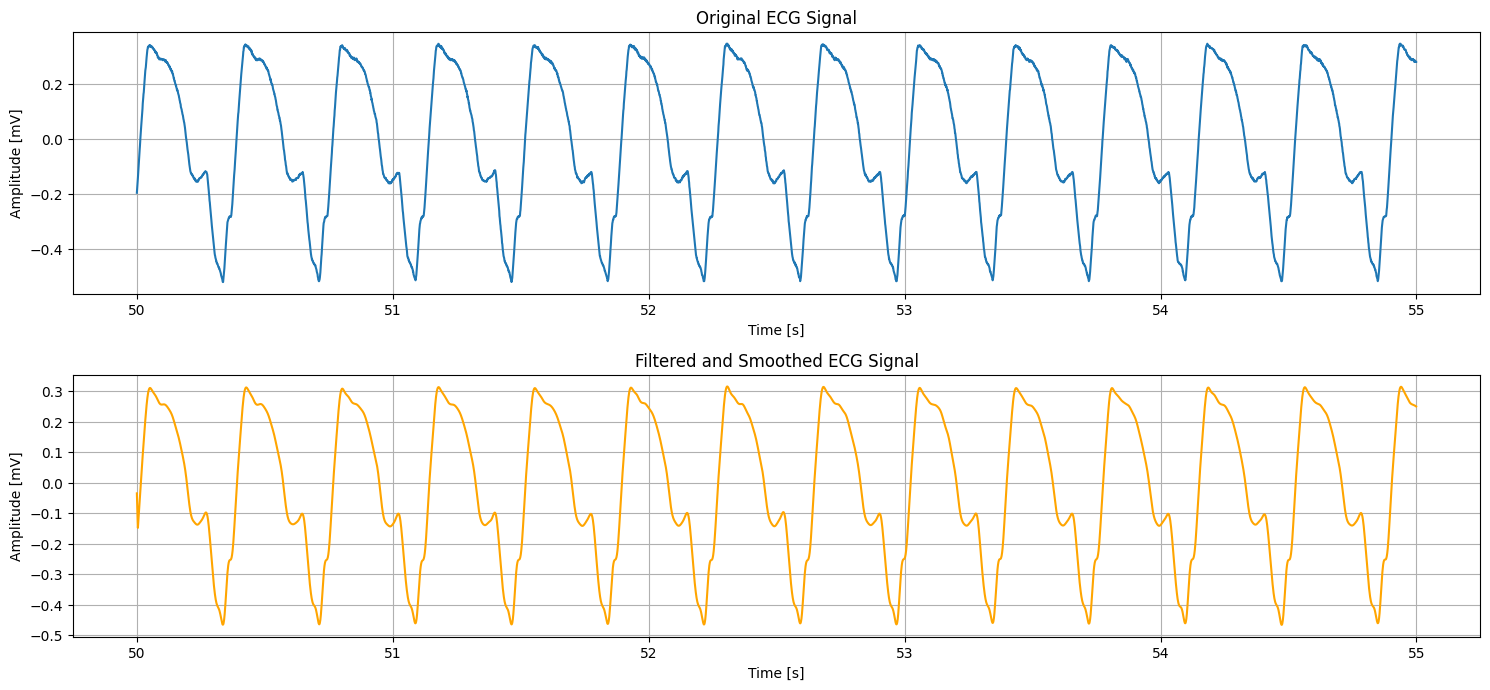

In [21]:
# URL of the raw text file containing ECG data
#url= "https://raw.githubusercontent.com/diego-taquiri/ISB-equipo11/main/Documentaci%C3%B3n/Laboratorio%2006/ecg_raw_data/reposo/opensignals_98D341FD4F0D_2024-04-19_12-34-17.txt"
#url = "https://raw.githubusercontent.com/diego-taquiri/ISB-equipo11/main/Documentaci%C3%B3n/Laboratorio%2006/ecg_raw_data/ejercicio/opensignals_98D341FD4F0D_2024-04-19_12-46-31.txt"
url= "https://raw.githubusercontent.com/diego-taquiri/ISB-equipo11/main/Documentaci%C3%B3n/Laboratorio%2006/ecg_raw_data/paro_cardiaco/opensignals_98D341FD4F0D_2024-04-19_12-56-28.txt"

# Download the data from the URL
response = urlopen(url)
data = response.read().decode('utf-8').splitlines()

# Load data from the downloaded text file skipping the first 3 rows
x = np.loadtxt(data, skiprows=3)

# Calculate data in millivolts
data_mV = (x[:, 5] / 1024) * 3.223 - 3.223 / 2

# Generate time array in seconds
time = np.arange(len(data_mV)) / 1000

start_index = np.searchsorted(time, 50)  # Find the index corresponding to 50 seconds
end_index = np.searchsorted(time, 55)  # Find the index corresponding to 120 seconds
time = time[start_index:end_index]
data_mV = data_mV[start_index:end_index]

# Bandpass filter design (0.5 Hz to 43 Hz)
fs = 1000  # Sampling frequency
nyquist = 0.5 * fs
low_cutoff = 0.5 / nyquist
high_cutoff = 43 / nyquist

# Design FIR filter
numtaps = 101  # Number of taps in the filter
b = firwin(numtaps, [low_cutoff, high_cutoff], pass_zero=False)

# Apply zero-phase digital bandpass filter
filtered_signal = filtfilt(b, 1, data_mV)

# Moving average filter design
window_size = 5  # Window size for the moving average filter
moving_avg_filter = np.ones(window_size) / window_size

# Apply moving average filter
smoothed_signal = lfilter(moving_avg_filter, 1, filtered_signal)

# Plot the original, filtered, and feature signals with detected peaks
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(time, data_mV, label='Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [mV]')
plt.title('Original ECG Signal')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(time, smoothed_signal, label='Filtered and Smoothed Signal', color='orange')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [mV]')
plt.title('Filtered and Smoothed ECG Signal')
plt.grid()

plt.tight_layout()
plt.show()


Number of segments: 45
Segment shape: (600,)
Segment samples: 600
Increment samples: 100
Segment starts: [   0  100  200  300  400  500  600  700  800  900 1000 1100 1200 1300
 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700
 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100
 4200 4300 4400]


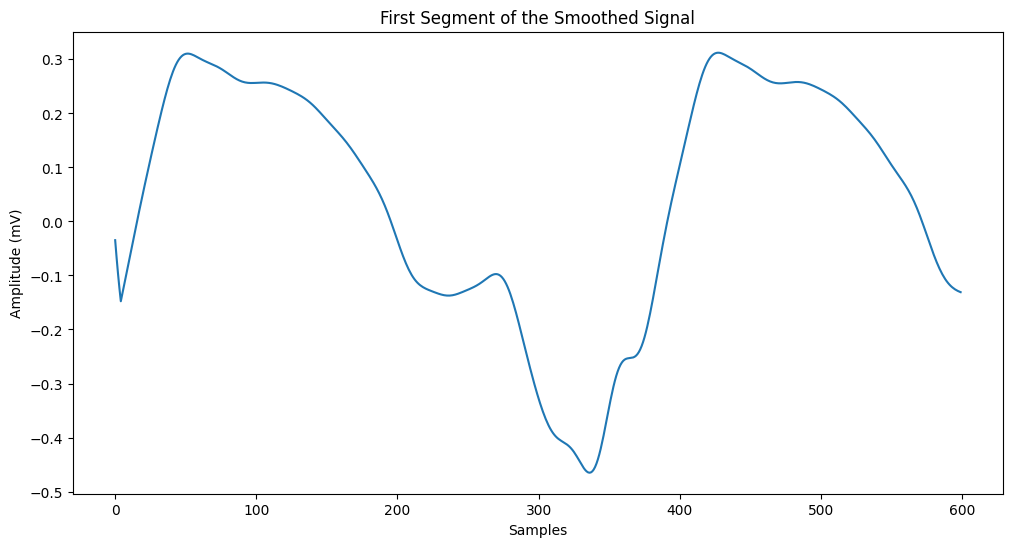

In [22]:
# Function to segment the signal
def segment_signal(signal, segment_length, increment, sampling_rate):
    segment_samples = int(segment_length * sampling_rate / 1000)
    increment_samples = int(increment * sampling_rate / 1000)
    segments = []
    for start in range(0, len(signal) - segment_samples + 1, increment_samples):
        end = start + segment_samples
        segments.append(signal[start:end])
    return np.array(segments), segment_samples, increment_samples, np.arange(0, len(signal) - segment_samples + 1, increment_samples)

# Segment parameters
segment_length = 600  # segment length in milliseconds
increment = 100  # increment in milliseconds

# Segment the smoothed signal
segments, segment_samples, increment_samples, segment_starts = segment_signal(smoothed_signal, segment_length, increment, fs)

# Print some information about the segments
print(f'Number of segments: {len(segments)}')
print(f'Segment shape: {segments[0].shape}')
print(f'Segment samples: {segment_samples}')
print(f'Increment samples: {increment_samples}')
print(f'Segment starts: {segment_starts}')

# Plot the first segment as an example
plt.figure(figsize=(12, 6))
plt.plot(segments[0])
plt.title('First Segment of the Smoothed Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude (mV)')
plt.show()

In [23]:
np.shape(segments)

(45, 600)

In [24]:
# Directory to save the CSV files
save_dir = './ecg_segments'

# Create the directory if it does not exist
os.makedirs(save_dir, exist_ok=True)

# Loop through each segment and save it as a CSV file
for i in range(segments.shape[0]):
    segment_data = segments[i]

    # Create a DataFrame with timestamps and channel data
    df = pd.DataFrame({
        'timestamp': np.arange(1, len(segment_data) + 1),
        'channel': segment_data
    })

    csv_file_path = os.path.join(save_dir, f'parocardiaco.segment{i+1}.csv')
    df.to_csv(csv_file_path, index=False)

print("CSV files saved successfully!")

CSV files saved successfully!
